[*********************100%***********************]  1 of 1 completed


Price      closing_price    change instant_return
Ticker              NVDA                         
Date                                             
2024-02-26     79.069588       NaN            NaN
2024-02-27     78.678688 -0.390900        -0.0050
2024-02-28     77.640991 -1.037697        -0.0133
2024-02-29     79.089577  1.448586         0.0185
2024-03-01     82.255676  3.166100         0.0393


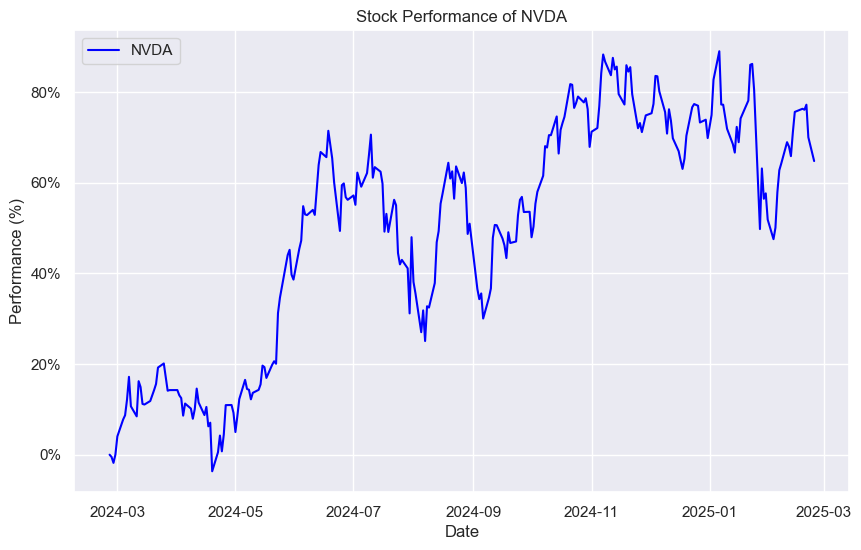

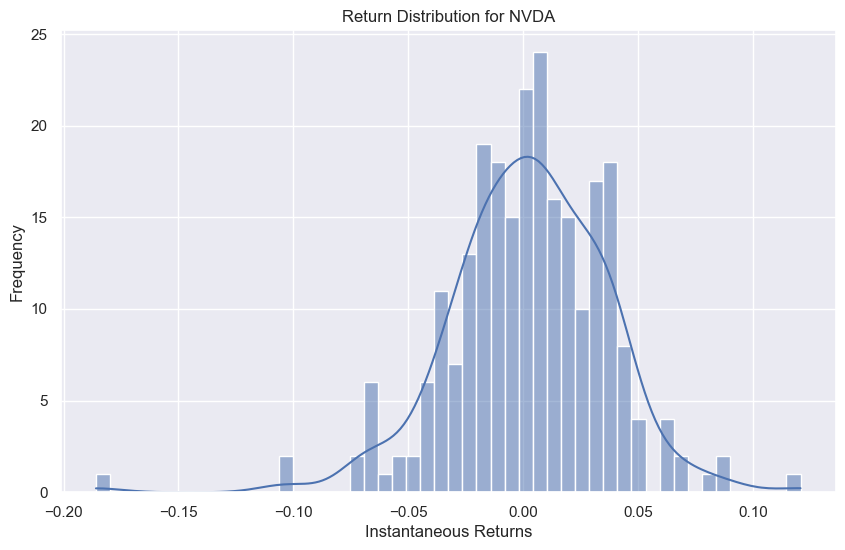

In [5]:
!pip install yfinance

import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sb
import yfinance as yf  # Import yfinance to fetch stock data

sb.set_theme()

DEFAULT_START = dt.date.isoformat(dt.date.today() - dt.timedelta(365))
DEFAULT_END = dt.date.isoformat(dt.date.today())

class Stock:
    def __init__(self, symbol, start=DEFAULT_START, end=DEFAULT_END):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.data = self.get_data()

    def get_data(self):
        """Download stock data and store in a DataFrame."""
        stock_data = yf.download(self.symbol, start=self.start, end=self.end)
        stock_data.index = pd.to_datetime(stock_data.index)
        stock_data = stock_data[['Close']]  # Keep only the closing prices
        stock_data.rename(columns={'Close': 'closing_price'}, inplace=True)
        self.calc_returns(stock_data)
        return stock_data

    def calc_returns(self, df):
        """Add change and instantaneous return columns to the DataFrame."""
        df['change'] = df['closing_price'].diff()
        df['instant_return'] = np.log(df['closing_price']).diff().round(4)

    def plot_return_dist(self):
        """Plot a histogram of the instantaneous returns."""
        plt.figure(figsize=(10, 6))
        sb.histplot(self.data['instant_return'].dropna(), bins=50, kde=True)
        plt.xlabel("Instantaneous Returns")
        plt.ylabel("Frequency")
        plt.title(f"Return Distribution for {self.symbol}")
        plt.grid(True)
        plt.show()

    def plot_performance(self):
        """Plot stock performance as percent gain/loss."""
        plt.figure(figsize=(10, 6))
        normalized_price = self.data['closing_price'] / self.data['closing_price'].iloc[0] - 1
        plt.plot(normalized_price * 100, label=self.symbol, color='blue')
        plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
        plt.xlabel("Date")
        plt.ylabel("Performance (%)")
        plt.title(f"Stock Performance of {self.symbol}")
        plt.legend()
        plt.grid(True)
        plt.show()


def main():
    stock_symbol = "NVDA"  # Example stock
    test = Stock(symbol=stock_symbol)
    print(test.data.head())  # Print the first few rows of data
    test.plot_performance()
    test.plot_return_dist()

if __name__ == '__main__':
    main()
